In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'Height')

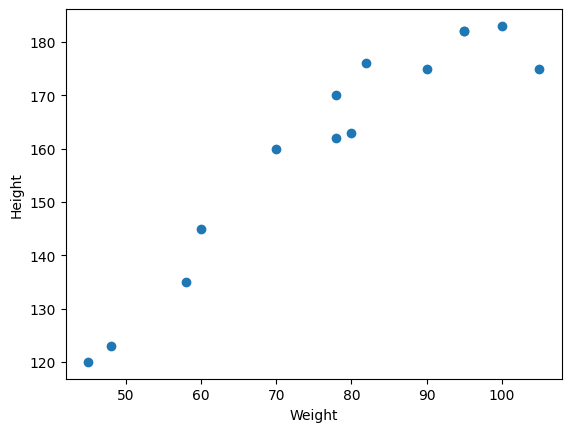

In [10]:
df = pd .read_excel('height_weight.xlsx')
df
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [25]:
#Divide our dataset into dependent and independent feture

X = df[['Weight']]  # independent  make it 2-D
y = df['Height']    # dependent


In [27]:
# divede into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((9, 1), (5, 1), (9,), (5,))

In [35]:
# Now we stardardise the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)    # to prevent the data leakage

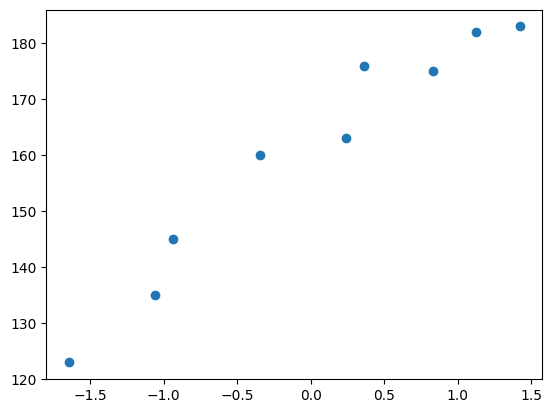

In [38]:
plt.scatter(X_train,y_train)

In [41]:
# Now we train the model using simple linear reggression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [43]:
print('The coefficent or slope :', regressor.coef_)
print('The intercept :',regressor.intercept_)

The coefficent or slope : [19.7620991]
The intercept : 160.22222222222223


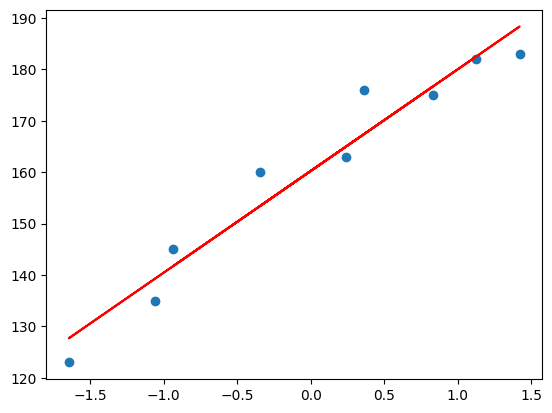

In [48]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

# Prediction of tran data 
#1. predicted height output = intercept + coefficient (Weight)
#i.e   y_pred_train = 160.2 + 19.7 (X_Train)


# Prediction of test data 
#1. predicted height output = intercept + coefficient (Weight)
#i.e   y_pred_test = 160.2 + 19.7 (X_Test)

In [53]:
y_pred_test = regressor.predict(X_test)
y_pred_test,y_test



(array([162.68397524, 182.50756534, 124.20288858, 194.16850069,
        162.68397524]),
 9     170
 11    182
 0     120
 12    175
 5     162
 Name: Height, dtype: int64)

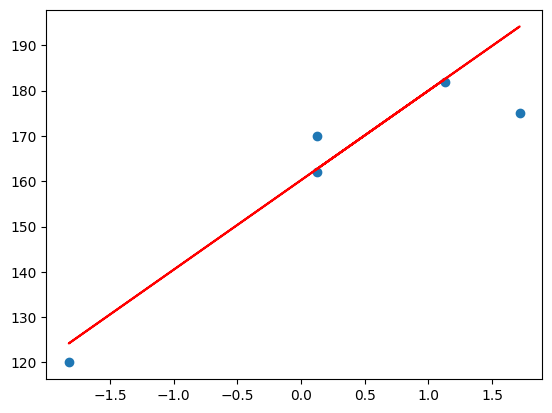

In [56]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

Performance Matrix

MSE,MAE,RMSE

R squre and adjusted R Square

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

87.86907080784586
6.375790921595604
9.373850372597477


R-Squre

In [63]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.8166950291892401

Adjusted R Square

In [65]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

# it's always less than R- Square

0.7555933722523202

#New Data Set

In [67]:
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\mayank1.vijay\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.24258253]])

In [69]:
regressor.predict([scaled_weight[0]])

array([165.01616231])

In [70]:
print("The predicted height for weight 80 is ", regressor.predict([scaled_weight[0]]))

The predicted height for weight 80 is  [165.01616231]
